In [45]:
# Compare sum(W) for selected genes and TFs between IDCBC (cancer) and mESC (healthy)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load Data
# -----------------------------

# Replace with correct paths if needed
idcbc_genes = pd.read_csv("sumW_exports/0.01/IDCBC_genes_sumW.csv", index_col=0)
idcbc_tfs = pd.read_csv("sumW_exports/0.01/IDCBC_TFs_sumW.csv", index_col=0)

mesc_genes = pd.read_csv("sumW_exports/0.01/mESC_genes_sumW.csv", index_col=0)
mesc_tfs = pd.read_csv("sumW_exports/0.01/mESC_TFs_sumW.csv", index_col=0)

In [46]:
# Define gene and TF lists to compare
gene_list = ['Nusap1', 'Oct4', 'Sox2', 'Cdk1', 'Ccnb1', 'Cdc20', 'Mad2l1', 'Ccna2', 'Zscan4', 'Esg1', 'Col4a1', 'Col1a1', 'Fn1', 'Fgf', '']  # Replace with your actual gene names
tf_list = ['Atf4', 'Pbx3', 'Spdef', 'Tnfaip8', 'Gata4', 'Sox3', 'Foxd3', 'Foxa1', 'Gata3', 'Esr1', 'Tp53']          # Replace with your actual TF names

In [47]:
# Prepare gene data
#Ensure genes are present in both indexes
gene_list_clean = np.array(set(idcbc_genes.index) & set(mesc_genes.index) & set(gene_list))

gene_data = pd.DataFrame({
    'IDCBC': idcbc_genes.loc[gene_list_clean, 'sum_W'],
    'mESC': mesc_genes.loc[gene_list_clean, 'sum_W']
})

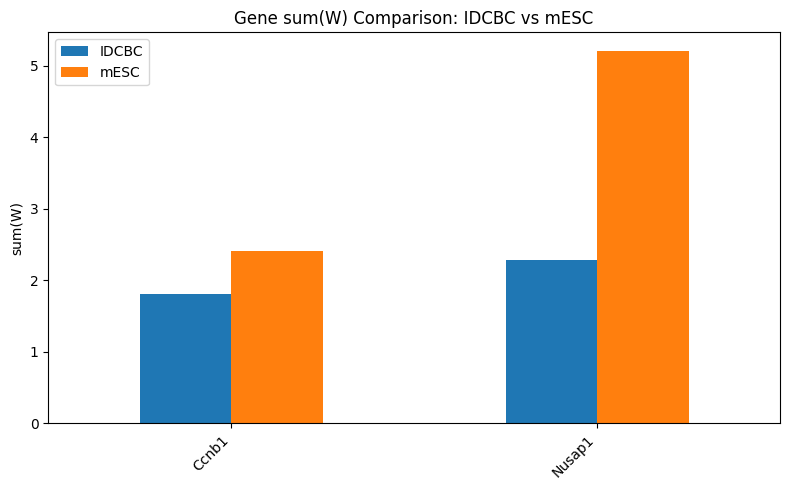

In [48]:
# Plot gene comparison
gene_data.plot(kind='bar', figsize=(8, 5))
plt.title("Gene sum(W) Comparison: IDCBC vs mESC")
plt.ylabel("sum(W)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
# Prepare TF data
#Ensure tfs are present in both indexes
tf_list_clean = [tf for tf in idcbc_tfs.index
              if any(tf_name in tf for tf_name in tf_list)
              and tf in mesc_tfs.index]

tf_data = pd.DataFrame({
    'IDCBC': idcbc_tfs.loc[tf_list_clean, 'sum_W'],
    'mESC': mesc_tfs.loc[tf_list_clean, 'sum_W']
})

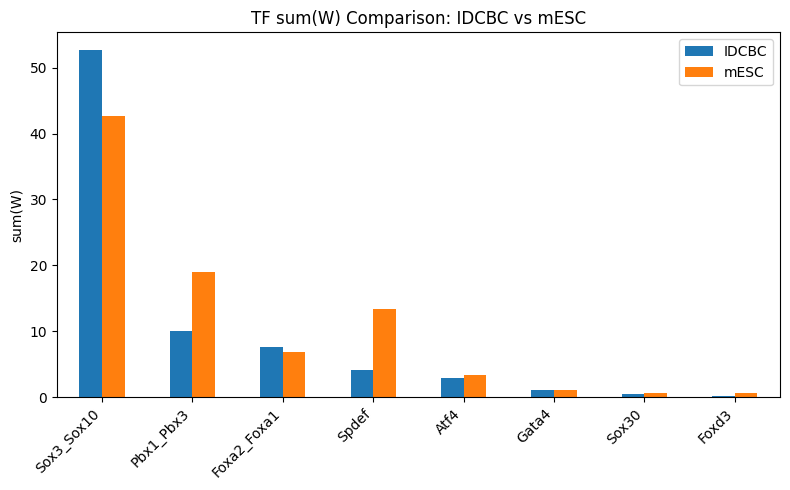

In [50]:
# Plot TF comparison
tf_data.plot(kind='bar', figsize=(8, 5))
plt.title("TF sum(W) Comparison: IDCBC vs mESC")
plt.ylabel("sum(W)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()